<a href="https://colab.research.google.com/github/Gcango/Analise_Explor_Descritiva_das_Ligacoes_911/blob/main/Explora%C3%A7%C3%A3o_Analise_911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este projecto, teve como objectivo uma analise profunda do dataset  com ligaçoes feitas ao centro de controle 911 dos EUA. No decorrer da exporação do dataset, varias perguntas e as respectivas respostas surgem para o devido entendimento. Esse dataset esta também disponível no Kaggle.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dados = pd.read_csv("/content/911.csv")

In [4]:
dados.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


In [5]:
dados.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56748 entries, 0 to 56747
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        56748 non-null  float64
 1   lng        56748 non-null  float64
 2   desc       56748 non-null  object 
 3   zip        49490 non-null  float64
 4   title      56748 non-null  object 
 5   timeStamp  56748 non-null  object 
 6   twp        56725 non-null  object 
 7   addr       56427 non-null  object 
 8   e          56747 non-null  float64
dtypes: float64(4), object(5)
memory usage: 3.9+ MB


In [10]:
print(f'O dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset possui 56748 linhas e 9 colunas


In [ ]:
#) 1 - Quais são os 10 principais codigos postais para as chamadas ao 911? coluna(ZIP)

In [19]:
cod_post = dados['zip'].value_counts().head(10)

In [20]:
print(f'Os 10 principais codigos postais são: \n{cod_post}')

Os 5 principais codigos postais são: 
19401.0    4076
19464.0    3811
19403.0    2784
19446.0    2688
19406.0    1780
19468.0    1713
19002.0    1690
19454.0    1575
19090.0    1496
19426.0    1486
Name: zip, dtype: int64


In [ ]:
#) 2 - Quais são os 10 municipios como mais ligações ao 911? coluna(twp)

In [22]:
municipios = dados['twp'].value_counts().head(10)

In [23]:
print(f'Os 10 com mais ligações ao 911 são: \n{municipios}')

Os 10 que mais ligam ao 911 são: 
LOWER MERION        4630
ABINGTON            3459
NORRISTOWN          3448
UPPER MERION        2941
CHELTENHAM          2584
POTTSTOWN           2310
UPPER MORELAND      1914
LOWER PROVIDENCE    1907
HORSHAM             1777
PLYMOUTH            1710
Name: twp, dtype: int64


In [ ]:
#) 3 - Apresenta as exclusividades da coluna title das ligações 911?

In [27]:
excl_title = dados['title'].nunique()

In [29]:
print(f'A quantidate de titulos distintos no dataset são:{excl_title}')

A quantidate de titulos distintos no dataset são:102


4 - Tendo em conta a diversidade de dados existente na coluna title, o que torna dificil análise, cria uma nova coluna com o nome de Reason para agregar volores de string caso o valor for EMS.

In [30]:
dados['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
56743               Fire: FIRE ALARM
56744                 EMS: DIZZINESS
56745    Traffic: VEHICLE ACCIDENT -
56746          EMS: SYNCOPAL EPISODE
56747     EMS: ALTERED MENTAL STATUS
Name: title, Length: 56748, dtype: object

In [32]:
var = dados['title'].iloc[0]

In [33]:
var.split(':')[0]

'EMS'

In [34]:
dados['Reason'] = dados['title'].apply(lambda title: title.split(':')[0])

In [35]:
dados['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
56743       Fire
56744        EMS
56745    Traffic
56746        EMS
56747        EMS
Name: Reason, Length: 56748, dtype: object

In [36]:
dados.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0,EMS


In [ ]:
#) 5 - Apresenta os motivos mais comum nas chamadas efectuadas ao 911. coluna(Reason)

In [37]:
motivo = dados['Reason'].value_counts()

In [39]:
print(f'Os motivos mais comum nas ligações efecuadas são:\n{motivo}')

Os motivos mais comum nas ligações efecuadas são:
EMS        27769
Traffic    20581
Fire        8398
Name: Reason, dtype: int64


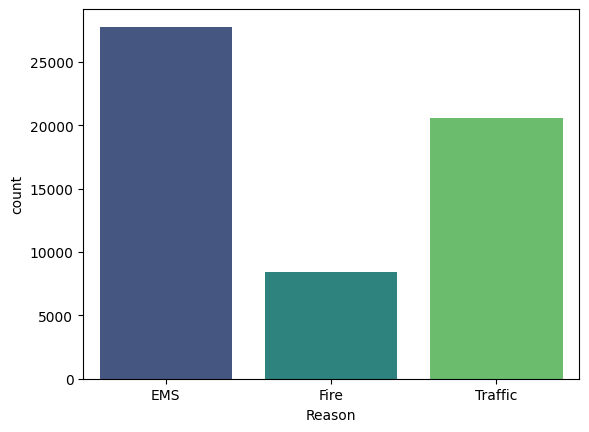

In [49]:
sns.countplot(x = 'Reason', data = dados, hue='Reason', palette='viridis');

In [ ]:
#) 6 - Faça uma uma apreciação na coluna (timeStamp)

In [53]:
dados['timeStamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 56748 entries, 0 to 56747
Series name: timeStamp
Non-Null Count  Dtype 
--------------  ----- 
56748 non-null  object
dtypes: object(1)
memory usage: 443.5+ KB


In [55]:
type(dados['timeStamp'].iloc[0])

str

In [ ]:
#-> COnverção da coluna timesStamp de String para Datetime

In [56]:
dados['timeStamp'] = pd.to_datetime(dados['timeStamp'])

In [57]:
type(dados['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [58]:
time = dados['timeStamp'].iloc[0]
time.hour

17

In [59]:
time.dayofyear

344

In [ ]:
#-> Criação das colunas [Hour, Month e Day of Week] no dataset

In [60]:
dados['Hour'] = dados['timeStamp'].apply(lambda time: time.hour)
dados['Month'] = dados['timeStamp'].apply(lambda time: time.month)
dados['DayofWeek'] = dados['timeStamp'].apply(lambda time: time.dayofweek)

In [61]:
dados.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'Hour', 'Month', 'DayofWeek'],
      dtype='object')

In [63]:
dados.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayofWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,Fire,17,12,3


In [ ]:
#-> COnverção da coluna Day of Week de numeros para nomes de semanas (considerando seg - 1, terça - 2 e assim sucessivamente)

In [64]:
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [65]:
dados['DayofWeek'] = dados['DayofWeek'].map(dmap)

In [66]:
dados.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayofWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,Fire,17,12,Thu


In [ ]:
#)7 - Apresente graficamente a contagem da coluna Dia da Semana com o matiz baseado na coluna Motivo.

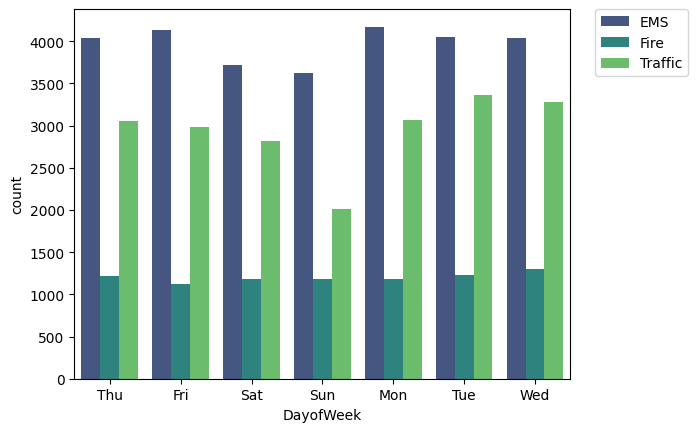

In [69]:
sns.countplot(x = 'DayofWeek', data = dados, hue='Reason', palette='viridis');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [ ]:
#)8 - Apresente graficamente os motivos das ligações distribuidos por meses.

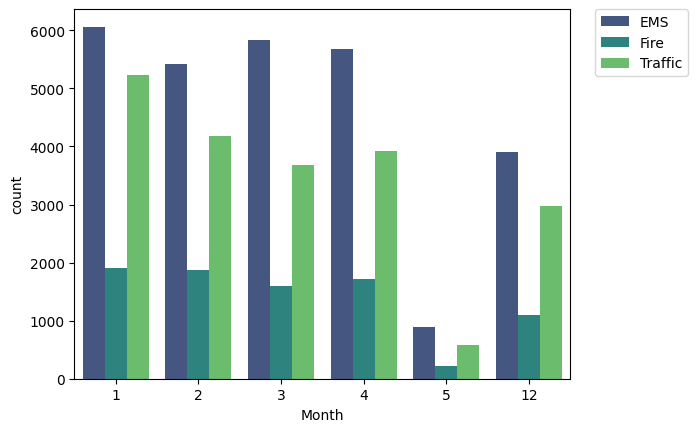

In [70]:
sns.countplot(x = 'Month', data = dados, hue='Reason', palette='viridis');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [ ]:
#)9 - Apresente de outra forma os motivos mensais das ligações evidenciando os meses faltantes no grafico acima.

In [71]:
por_meses = dados.groupby('Month').count()

In [73]:
por_meses.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayofWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,1680,1680,1680,1476,1680,1680,1679,1677,1679,1680,1680,1680
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [ ]:
#-> Utilizando a latitude.

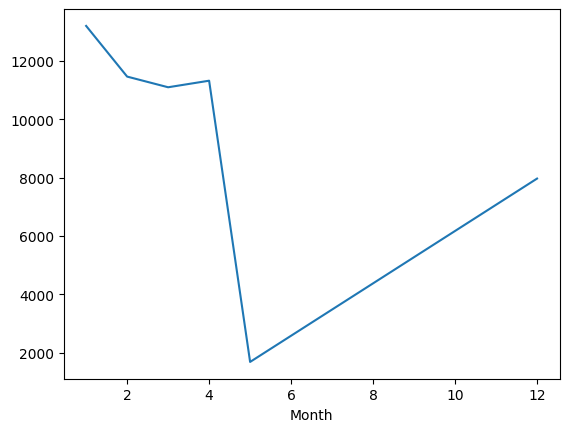

In [75]:
por_meses['lat'].plot();

In [82]:
#)10 - Apresente de forma gráfica, recorrendo ao lmplot() seaborn um ajuste linear no numero de chamadas por mês.

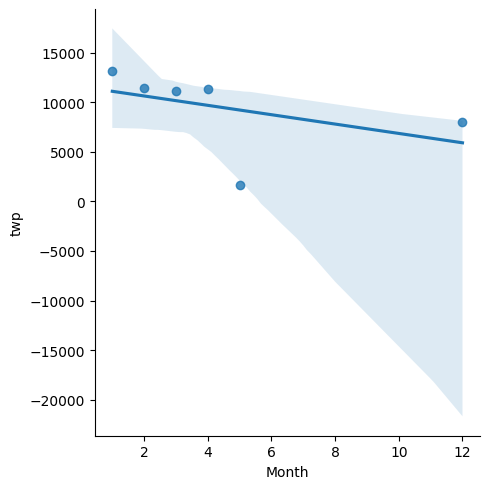

In [83]:
sns.lmplot(x='Month', y='twp', data=por_meses.reset_index());

In [ ]:
#)11 - Apresente no dataset uma coluna exclusiva para data no formato de ano-mês-dia.

In [84]:
var_t = dados['timeStamp'].iloc[0]

In [85]:
dados['Date'] = dados['timeStamp'].apply(lambda var_t:var_t.date())

In [86]:
dados.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayofWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0,EMS,17,12,Thu,2015-12-10


In [ ]:
#)12 - Apresente graficamente um agregado entre a Data e latitude para representar a contagem de chamadas por datas específicas.

In [87]:
dados.groupby('Date').count()['lat']

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-05-02    343
2016-05-03    361
2016-05-04    342
2016-05-05    362
2016-05-06    132
Name: lat, Length: 149, dtype: int64

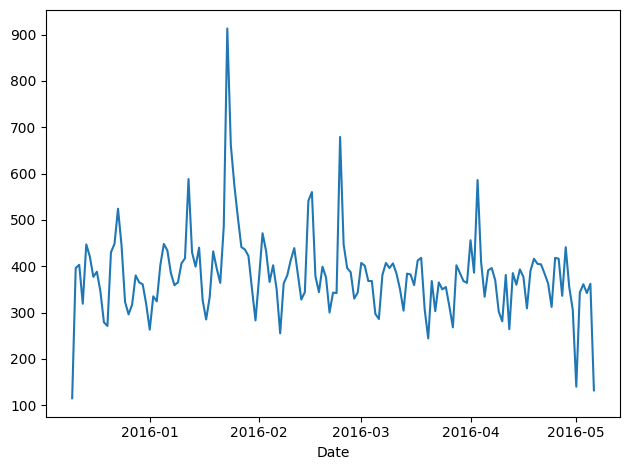

In [88]:
dados.groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [ ]:
#)12 - Apresente os motivos das ligações graficamente distribuidos por datas.

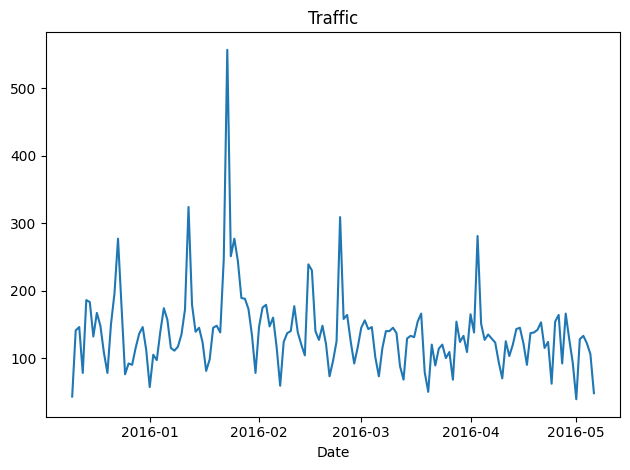

In [89]:
dados[dados['Reason'] =='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

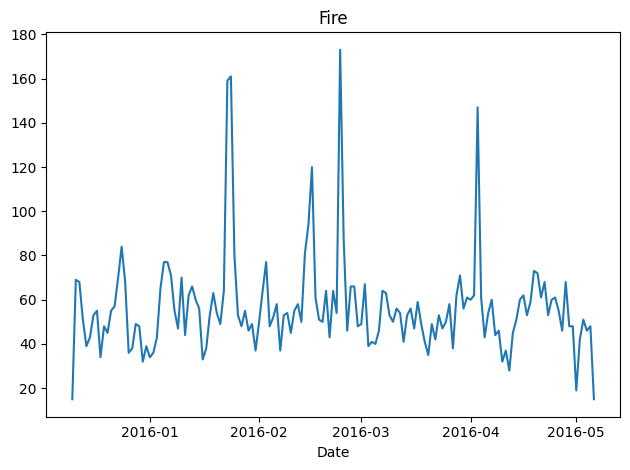

In [90]:
dados[dados['Reason'] =='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

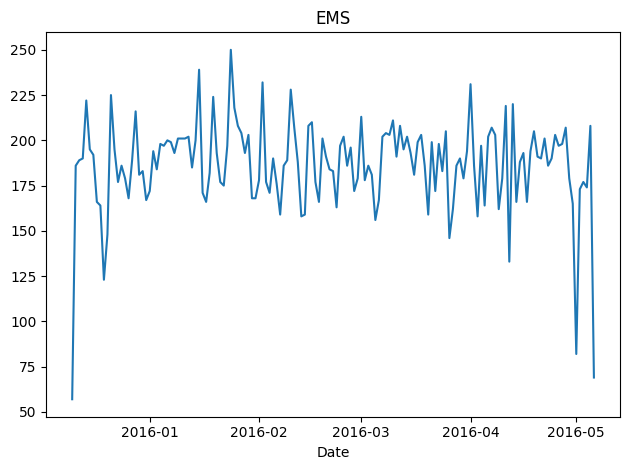

In [92]:
dados[dados['Reason'] =='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

13) - Cria uma representação dos dados de MAPA de CALOR. Para isso, é necessario filtrar algumas colunas como horas e dia de semana, bem como algum trabalho de tornar Horas como indices etc.

In [93]:
data_hour = dados.groupby(by=['DayofWeek','Hour']).count()['Reason'].unstack()

In [94]:
data_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayofWeek,,,,,,,,,,,,,,,,,,,,,
Fri,159,139,117,102,120,111,206,339,435,432,...,528,494,538,554,492,393,378,313,288,263
Mon,171,123,131,108,109,161,256,405,463,434,...,483,491,554,584,510,425,319,259,273,195
Sat,191,179,149,156,139,135,172,257,261,357,...,446,465,476,420,477,391,351,319,276,273
Sun,224,169,169,147,134,151,182,257,298,379,...,381,355,358,398,371,365,282,234,216,169
Thu,180,107,129,93,107,111,230,337,457,513,...,496,534,488,553,493,414,376,319,222,205
Tue,138,121,99,99,128,137,249,420,535,537,...,497,530,598,547,512,395,370,300,265,160
Wed,147,117,104,125,85,151,263,416,532,425,...,538,484,548,599,532,446,408,355,298,197


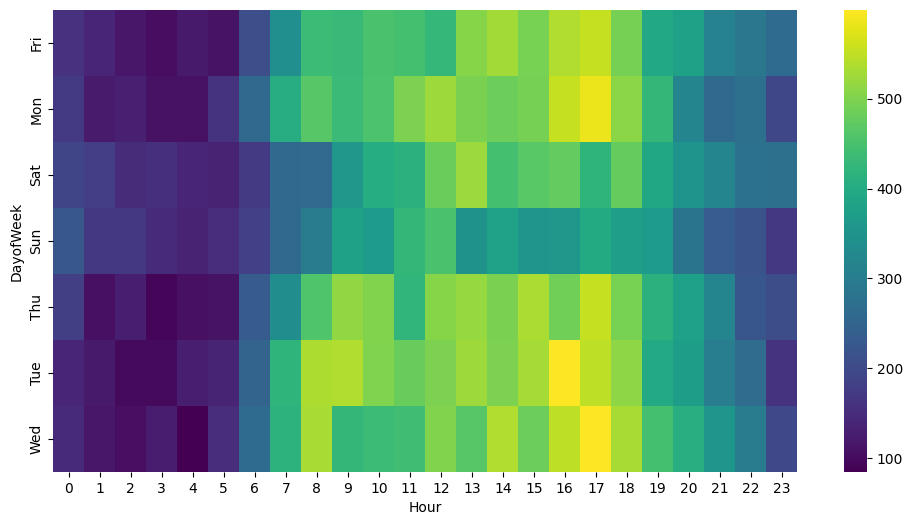

In [95]:
plt.figure(figsize=(12,6))
sns.heatmap(data_hour, cmap='viridis');

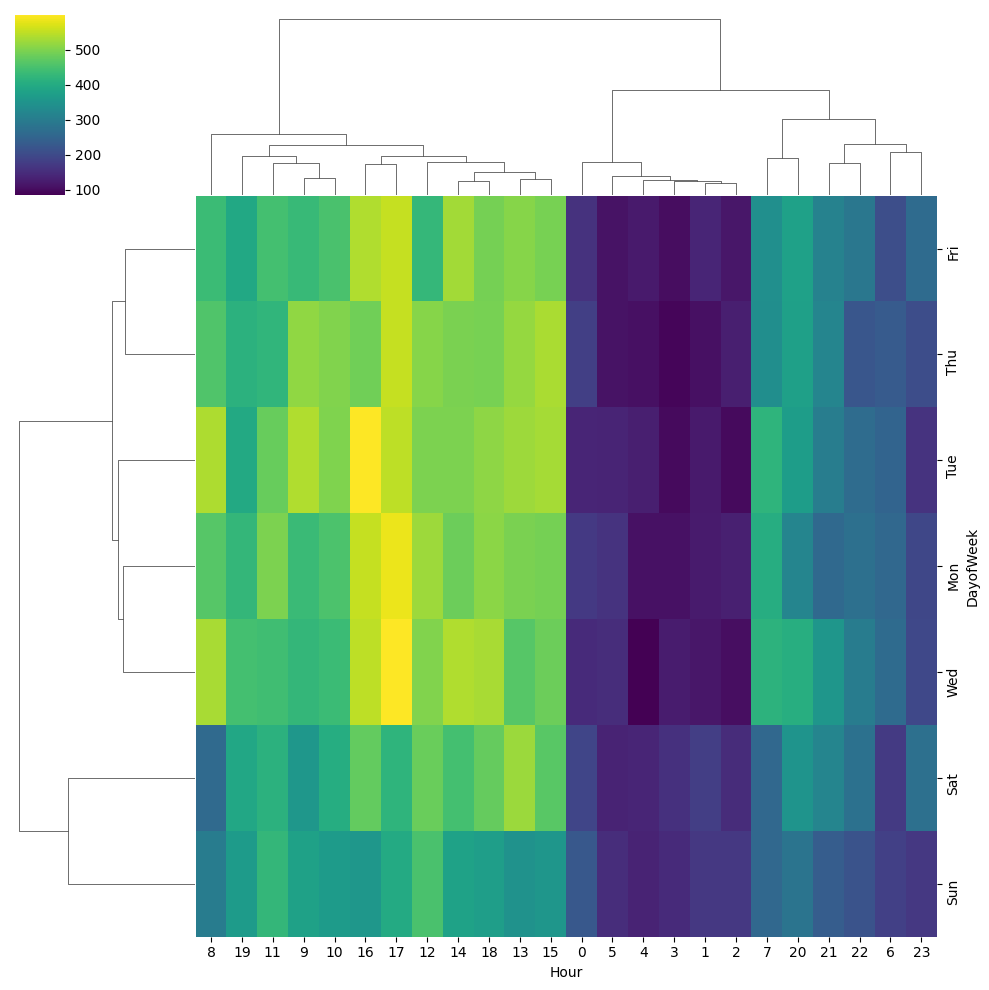

In [96]:
sns.clustermap(data_hour, cmap = 'viridis');

14) - Cria a mesma representação dos dados de MAPA de CALOR, para a filtragem das colunas Meses e dias da semana.

In [97]:
data_month = dados.groupby(by=['DayofWeek','Month']).count()['Reason'].unstack()

In [99]:
data_month.head(4)

Month,1,2,3,4,5,12
DayofWeek,,,,,,
Fri,1970.0,1581.0,1525.0,1958.0,132.0,1065.0
Mon,1727.0,1964.0,1535.0,1598.0,343.0,1257.0
Sat,2291.0,1441.0,1266.0,1734.0,NaN,978.0
Sun,1960.0,1229.0,1102.0,1488.0,140.0,907.0


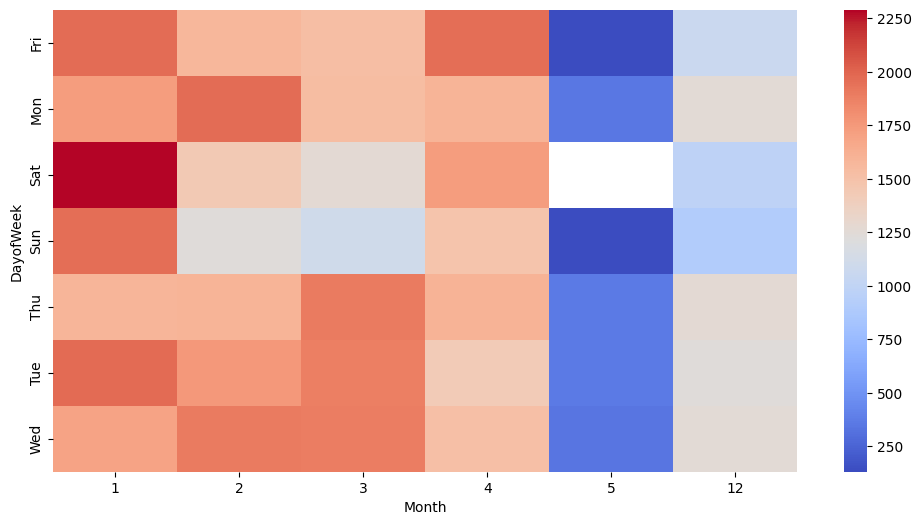

In [100]:
plt.figure(figsize=(12,6))
sns.heatmap(data_month, cmap='coolwarm');